# Constants & Init

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import minerl

In [3]:
MINERL_GYM_ENV = 'MineRLNavigateDenseVectorObf-v0'
MINERL_DATA_ROOT = 'data/'
TRAJECTORY_NAME = 'v3_excellent_pluot_behemoth-4_3461-4804'

# Trajectory

This is a visualization of the trajectory `TRAJECTORY_NAME` from the dataset `MINERL_GYM_ENV` as specified above. 

In [4]:
data = minerl.data.make(MINERL_GYM_ENV, data_dir=MINERL_DATA_ROOT)
trajectory = data.load_data(TRAJECTORY_NAME)
frames = list([x for x in trajectory])

100%|██████████| 1325/1325 [00:00<00:00, 98620.33it/s]


## Shape info
`trajectory` is a generator, each item has 5 values in a tuple: `state`, `action`, `reward`, `new_state`, `done`

In [5]:
state, action, reward, new_state, done = frames[0]
def shape_info(name, d):
    print(f"{name}:", type(state), "keys:", d.keys())
    for key in d.keys():
        print(f"{name} {key}:", type(d[key]), d[key].shape)
shape_info("state", state)
shape_info("action", action)
print("reward:", type(reward), reward)
shape_info("new_state", new_state)
print("done:", type(done))

state: <class 'collections.OrderedDict'> keys: odict_keys(['pov', 'vector'])
state pov: <class 'numpy.ndarray'> (64, 64, 3)
state vector: <class 'numpy.ndarray'> (64,)
action: <class 'collections.OrderedDict'> keys: odict_keys(['vector'])
action vector: <class 'numpy.ndarray'> (64,)
reward: <class 'numpy.float32'> -0.029967608
new_state: <class 'collections.OrderedDict'> keys: odict_keys(['pov', 'vector'])
new_state pov: <class 'numpy.ndarray'> (64, 64, 3)
new_state vector: <class 'numpy.ndarray'> (64,)
done: <class 'numpy.bool_'>


## Action Space

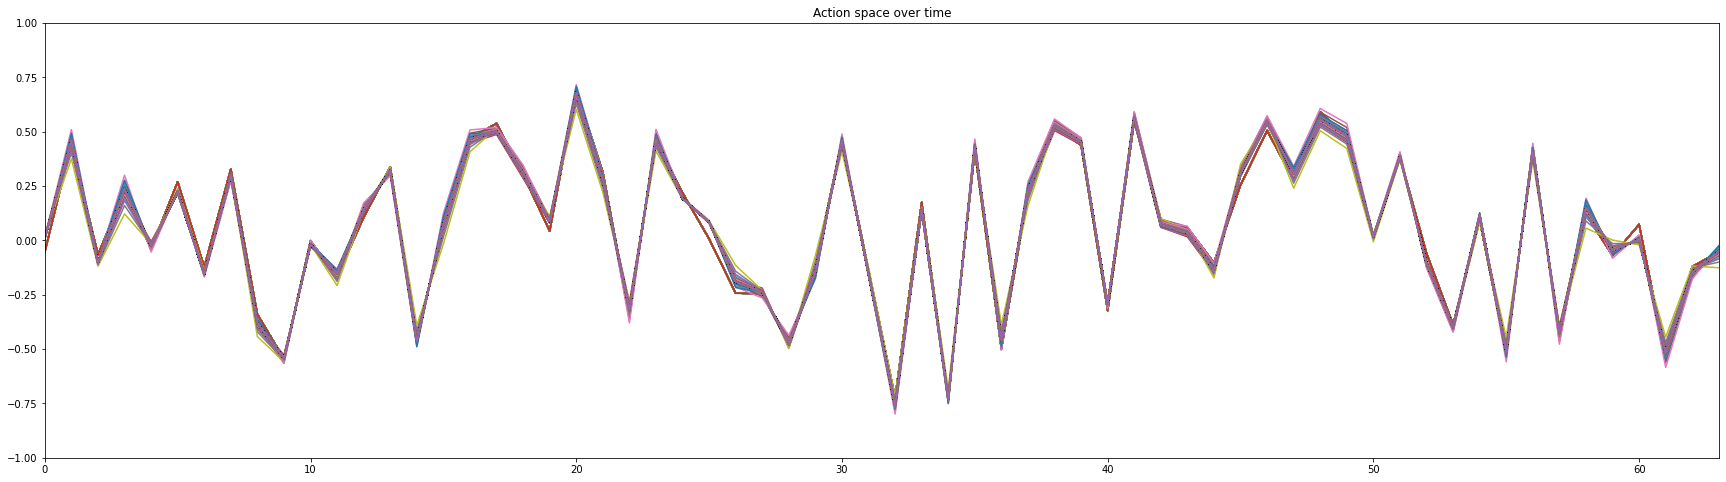

In [6]:
actions = list([x[1]["vector"] for x in frames])
value_over_frames = np.empty((len(frames), actions[0].shape[0]))
for i, action in enumerate(actions):
    for j, value in enumerate(action):
        value_over_frames[i][j] = value

fig = plt.figure(figsize=(30, 8))
plt.title("Action space over time")
plt.xlim(0, 63)
plt.ylim(-1, 1)
for i, frame_values in enumerate(value_over_frames):
    plt.plot(np.array(range(len(frame_values))), frame_values)

plt.show()

### Visualize model predictions

In [7]:
from models import make_diamond_miner_model
model = make_diamond_miner_model((64, 64, 3), (64,))

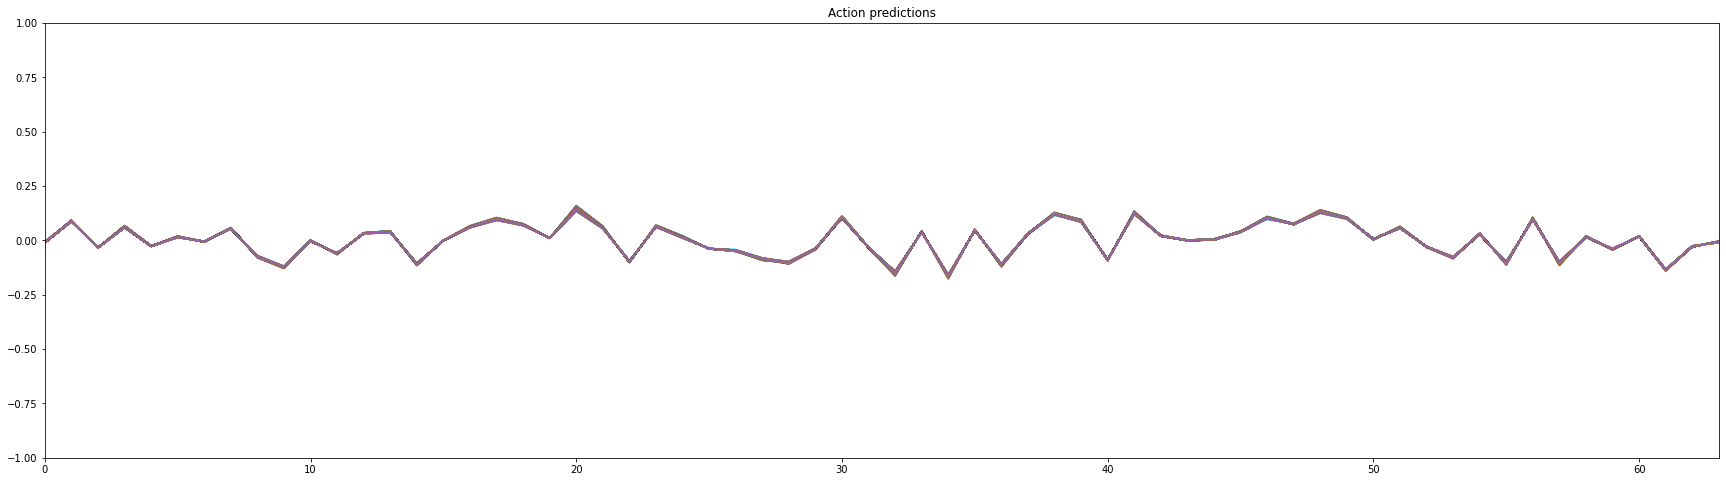

In [11]:
model.load_weights("ckpt/episode-71.h5")
states = list([x[0] for x in frames])

pov = np.array([x["pov"] for x in states]).reshape((-1, 64, 64, 3))
vector = np.array([x["vector"] for x in states]).reshape((-1, 64))
actions = model.predict([pov, vector])
for i, action in enumerate(actions):
    for j, value in enumerate(action):
        value_over_frames[i][j] = value

fig = plt.figure(figsize=(30, 8))
plt.title("Action predictions")
plt.xlim(0, 63)
plt.ylim(-1, 1)
for i, frame_values in enumerate(value_over_frames):
    plt.plot(np.array(range(len(frame_values))), frame_values)

plt.show()

## Observation space

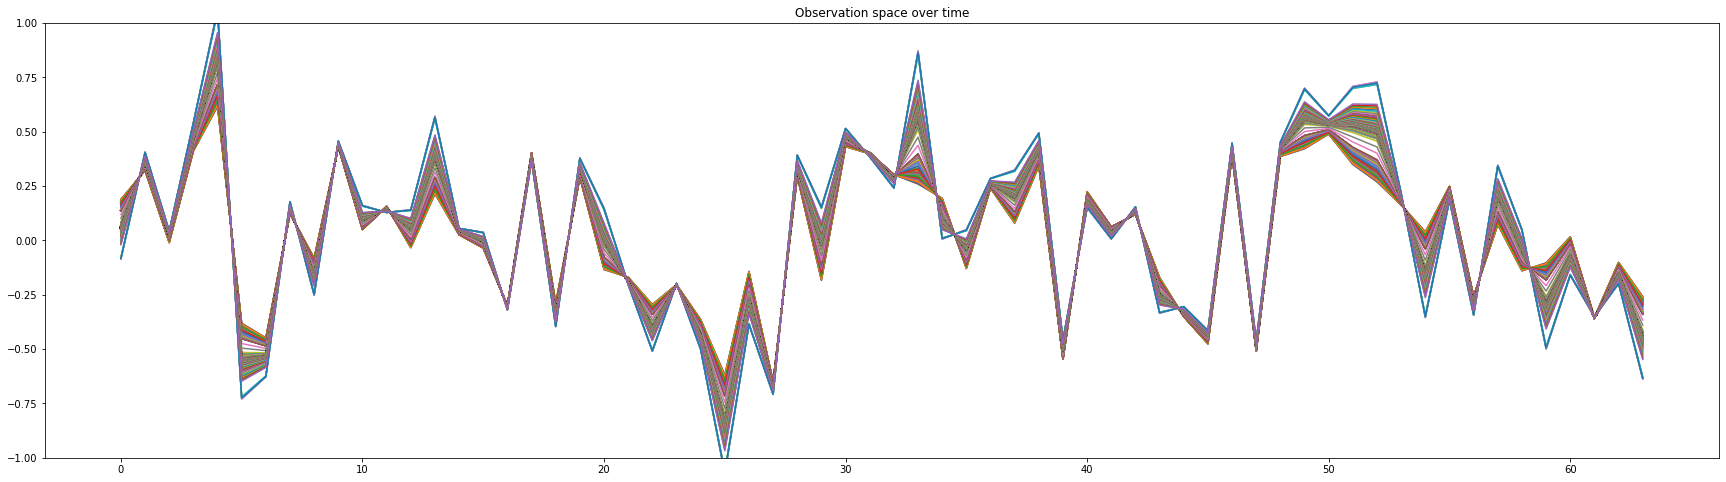

In [9]:
actions = list([x[0]["vector"] for x in frames])
value_over_frames = np.empty((len(frames), actions[0].shape[0]))
for i, action in enumerate(actions):
    for j, value in enumerate(action):
        value_over_frames[i][j] = value

fig = plt.figure(figsize=(30, 8))
plt.title("Observation space over time")
plt.ylim(-1, 1)
for i, frame_values in enumerate(value_over_frames):
    plt.plot(np.array(range(len(frame_values))), frame_values)

plt.show()